In [13]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
FOLD = 0

In [4]:
EXP_PATH = Path.cwd()
ROOT_DIR = EXP_PATH.parents[2]
exp_name = EXP_PATH.name
RAW_DATA_DIR = ROOT_DIR / 'data' / 'original_data'
DATA_DIR = ROOT_DIR / 'data' / 'kaggle_dataset' / 'irohith_tfrecords'
SAVE_DIR = ROOT_DIR / 'outputs' / exp_name / f'fold{FOLD}'
SAVE_DIR.mkdir(parents=True, exist_ok=True)

In [8]:
oof_df = pd.read_csv(SAVE_DIR / 'oof_df.csv')

<Axes: ylabel='Frequency'>

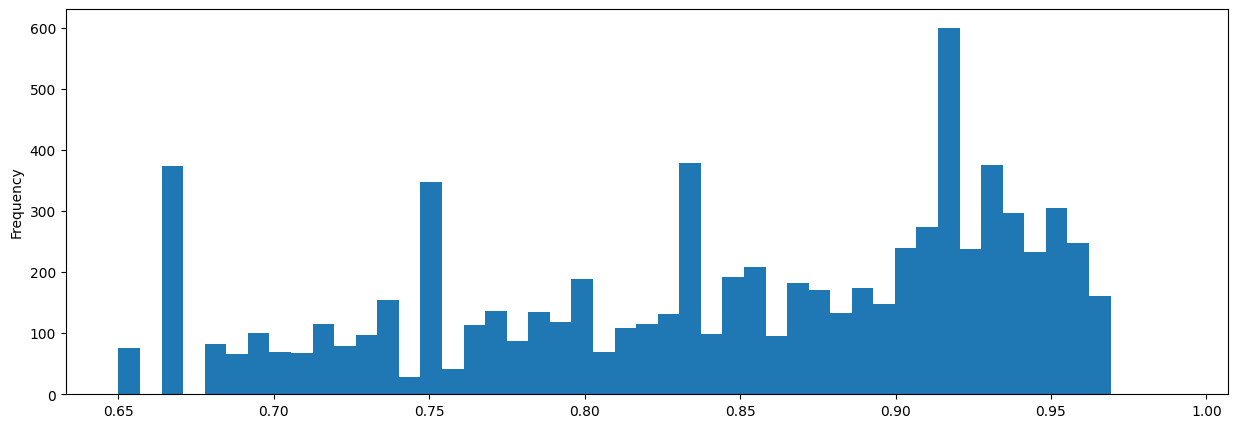

In [24]:
oof_df['score'].plot(kind='hist', bins=np.linspace(0.65, 0.99, 50), figsize=(15, 5))

In [ ]:
oof_df

In [28]:
oof_df.query('0.66 < score < 0.67')

,sequence_id,phrase,pred,score,fold
51,1496536743,4043 fk gold creek,4043f kogralk creek,0.666667,0
59,1496656323,45 ferdinand plaza,4 eldiand pla,0.666667,0
87,1497449233,977-842-9470,8787-84-970,0.666667,0
155,1499627724,lazaro portillo,la portilo,0.666667,0
225,1501935913,+229-31-4768-99-06,+220-2-31-478-99-,0.666667,0
...,...,...,...,...,...
16720,1966479255,chelsea summers,chelesea seume,0.666667,0
16724,1966576323,+591-903-780-3398-834,+59-903-780-396,0.666667,0
16741,1967171983,234-238-0884,234-2308,0.666667,0
16826,1969436894,www.carninyprimary.co.uk,www.cuinyrinmdryco.ut,0.666667,0
